In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from analysis_functions import Analysis
import pandas as pd

2023-06-09 15:49:37.687069: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-09 15:49:37.687136: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# 1) Observables in the 2-Qubit UQC

## 1.1) Commuting Observables

The UQC architecture consists of RZ and RY rotations. In terms of the commuting observables we can use in the 2 qubit case, we have three different choices:

- $Z_1 Z_2$
- $X_1 X_2$
- $Y_1 Y_2$

I'm interested in seeing if there are any noticeable differences in performance between these three choices. Particulalrly to see if using XX yields any differences, as the circuit doesnt have any X rotations.

In [4]:
uqc_2qubits_5layers_XX_path = "../../results/observables_uqc/uqc_2qubits_5layers_XX"
uqc_2qubits_5layers_YY_path = "../../results/observables_uqc/uqc_2qubits_5layers_YY"
uqc_2qubits_5layers_ZZ_path = "../../results/observables_uqc/uqc_2qubits_5layers_ZZ"

uqc_2qubits_5layers_XX = Analysis(uqc_2qubits_5layers_XX_path)
uqc_2qubits_5layers_YY = Analysis(uqc_2qubits_5layers_YY_path)
uqc_2qubits_5layers_ZZ = Analysis(uqc_2qubits_5layers_ZZ_path)

### 1.1.1) Performance

In [5]:
uqc_2qubits_5layers_XX_return = uqc_2qubits_5layers_XX.get_rewards()
uqc_2qubits_5layers_YY_return = uqc_2qubits_5layers_YY.get_rewards()
uqc_2qubits_5layers_ZZ_return = uqc_2qubits_5layers_ZZ.get_rewards()

uqc_2qubits_5layers_XX_return_mean = np.mean(uqc_2qubits_5layers_XX_return, axis=0)
uqc_2qubits_5layers_YY_return_mean = np.mean(uqc_2qubits_5layers_YY_return, axis=0)
uqc_2qubits_5layers_ZZ_return_mean = np.mean(uqc_2qubits_5layers_ZZ_return, axis=0)

uqc_2qubits_5layers_XX_return_std = np.std(uqc_2qubits_5layers_XX_return, axis=0)
uqc_2qubits_5layers_YY_return_std = np.std(uqc_2qubits_5layers_YY_return, axis=0)
uqc_2qubits_5layers_ZZ_return_std = np.std(uqc_2qubits_5layers_ZZ_return, axis=0)

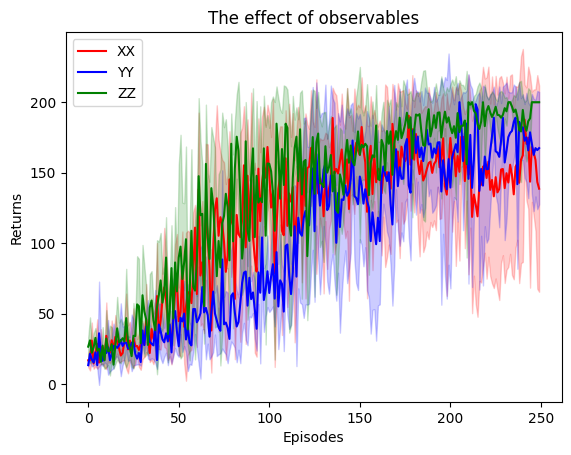

In [6]:
plt.plot(uqc_2qubits_5layers_XX_return_mean, color = "red", label="XX")
plt.plot(uqc_2qubits_5layers_YY_return_mean, color = "blue", label="YY")
plt.plot(uqc_2qubits_5layers_ZZ_return_mean, color = "green", label="ZZ")
plt.fill_between(np.arange(len(uqc_2qubits_5layers_XX_return_mean)), uqc_2qubits_5layers_XX_return_mean - uqc_2qubits_5layers_XX_return_std, uqc_2qubits_5layers_XX_return_mean + uqc_2qubits_5layers_XX_return_std, alpha=0.2, color="red")
plt.fill_between(np.arange(len(uqc_2qubits_5layers_YY_return_mean)), uqc_2qubits_5layers_YY_return_mean - uqc_2qubits_5layers_YY_return_std, uqc_2qubits_5layers_YY_return_mean + uqc_2qubits_5layers_YY_return_std, alpha=0.2, color="blue")
plt.fill_between(np.arange(len(uqc_2qubits_5layers_ZZ_return_mean)), uqc_2qubits_5layers_ZZ_return_mean - uqc_2qubits_5layers_ZZ_return_std, uqc_2qubits_5layers_ZZ_return_mean + uqc_2qubits_5layers_ZZ_return_std, alpha=0.2, color="green")
plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Returns")
plt.title("The effect of observables")
plt.show()

We dont seem to see any significant differences. The performance of the three choices is very similar, except for the fact that the Y observables seem to learn a little bit more slowly in the beggining, but they all seem to converge to the same value. It is interesting because maybe I was expecting the model that uses XX observable to learn a little bit slower, since the circuit doesnt have any X rotations and so it has to change the Z and Y rotations in a way that changes the XX observable.

### 1.1.2) Relative Parameter Change

In [7]:
uqc_2qubits_5layers_XX_parameters_relative_change = uqc_2qubits_5layers_XX.get_parameters_relative_change()
uqc_2qubits_5layers_YY_parameters_relative_change = uqc_2qubits_5layers_YY.get_parameters_relative_change()
uqc_2qubits_5layers_ZZ_parameters_relative_change = uqc_2qubits_5layers_ZZ.get_parameters_relative_change()

def filter_lists(lists):
    min_length = 10000  # Find the length of the smallest list
    
    filtered_lists = []
    for lst in lists:
        filtered_lst = lst[:min_length]  # Take only the first min_length elements
        filtered_lists.append(filtered_lst)  # Add the filtered list to the result
    
    return filtered_lists

uqc_2qubits_5layers_XX_parameters_relative_change_filtered = filter_lists(uqc_2qubits_5layers_XX_parameters_relative_change)
uqc_2qubits_5layers_YY_parameters_relative_change_filtered = filter_lists(uqc_2qubits_5layers_YY_parameters_relative_change)
uqc_2qubits_5layers_ZZ_parameters_relative_change_filtered = filter_lists(uqc_2qubits_5layers_ZZ_parameters_relative_change)

uqc_2qubits_5layers_XX_parameters_relative_change_mean = np.mean(uqc_2qubits_5layers_XX_parameters_relative_change_filtered, axis=0)
uqc_2qubits_5layers_YY_parameters_relative_change_mean = np.mean(uqc_2qubits_5layers_YY_parameters_relative_change_filtered, axis=0)
uqc_2qubits_5layers_ZZ_parameters_relative_change_mean = np.mean(uqc_2qubits_5layers_ZZ_parameters_relative_change_filtered, axis=0)

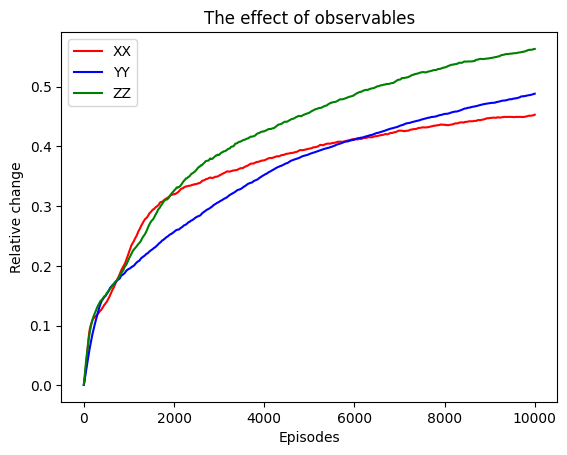

In [8]:
plt.plot(uqc_2qubits_5layers_XX_parameters_relative_change_mean, color = "red", label="XX")
plt.plot(uqc_2qubits_5layers_YY_parameters_relative_change_mean, color = "blue", label="YY")
plt.plot(uqc_2qubits_5layers_ZZ_parameters_relative_change_mean, color = "green", label="ZZ")
plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Relative change")
plt.title("The effect of observables")
plt.show()

This result is interesting. Maybe I was expecting the relative parameter change to be higher for the XX observables, because the circuit doesnt have any X rotations, and so it has to change the Z and Y rotations in a way that also changes the X rotations, which is harder. But it seems that the relative parameter change is higher for the ZZ observables. Maybe this is because the ZZ observables are the easiest to learn, and so the circuit can change the parameters more freely, while the XX observables are harder to learn, and so the circuit has to be more careful when changing the parameters (This is a suggestion by Github Copilot). However, the difference is still small between the three models, and so it looks like the coice of observable doesnt affect the change of the parameters very much.

### 1.1.3) Gradients

In [9]:
uqc_2qubits_5layers_XX_mean_gradients, uqc_2qubits_5layers_XX_std_gradients = uqc_2qubits_5layers_XX.get_gradients_all_params()
uqc_2qubits_5layers_YY_mean_gradients, uqc_2qubits_5layers_YY_std_gradients = uqc_2qubits_5layers_YY.get_gradients_all_params()
uqc_2qubits_5layers_ZZ_mean_gradients, uqc_2qubits_5layers_ZZ_std_gradients = uqc_2qubits_5layers_ZZ.get_gradients_all_params()

In [10]:
uqc_2qubits_5layers_XX_mean_gradients_smoothed = pd.Series(uqc_2qubits_5layers_XX_mean_gradients).rolling(250).mean()
uqc_2qubits_5layers_YY_mean_gradients_smoothed = pd.Series(uqc_2qubits_5layers_YY_mean_gradients).rolling(250).mean()
uqc_2qubits_5layers_ZZ_mean_gradients_smoothed = pd.Series(uqc_2qubits_5layers_ZZ_mean_gradients).rolling(250).mean()

uqc_2qubits_5layers_XX_std_gradients_smoothed = pd.Series(uqc_2qubits_5layers_XX_std_gradients).rolling(250).mean()
uqc_2qubits_5layers_YY_std_gradients_smoothed = pd.Series(uqc_2qubits_5layers_YY_std_gradients).rolling(250).mean()
uqc_2qubits_5layers_ZZ_std_gradients_smoothed = pd.Series(uqc_2qubits_5layers_ZZ_std_gradients).rolling(250).mean()

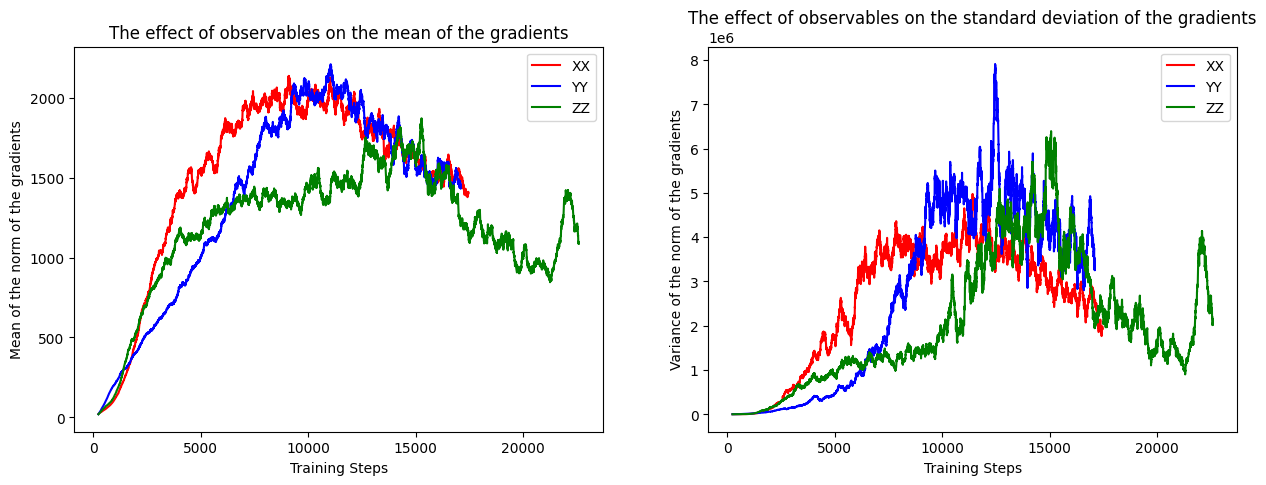

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(uqc_2qubits_5layers_XX_mean_gradients_smoothed, color = "red", label="XX")
axs[0].plot(uqc_2qubits_5layers_YY_mean_gradients_smoothed, color = "blue", label="YY")
axs[0].plot(uqc_2qubits_5layers_ZZ_mean_gradients_smoothed, color = "green", label="ZZ")
axs[0].legend()
axs[0].set_xlabel("Training Steps")
axs[0].set_ylabel("Mean of the norm of the gradients")
axs[0].set_title("The effect of observables on the mean of the gradients")

axs[1].plot(uqc_2qubits_5layers_XX_std_gradients_smoothed, color = "red", label="XX")
axs[1].plot(uqc_2qubits_5layers_YY_std_gradients_smoothed, color = "blue", label="YY")
axs[1].plot(uqc_2qubits_5layers_ZZ_std_gradients_smoothed, color = "green", label="ZZ")
axs[1].legend()
axs[1].set_xlabel("Training Steps")
axs[1].set_ylabel("Variance of the norm of the gradients")
axs[1].set_title("The effect of observables on the standard deviation of the gradients")

plt.show()


As we can see, the ZZ observable has the lowest gradients, and it is also the model that learned the quickest. What does this tell us? Still, it doesnt matter a lot since the magnitude of the gradients are very similar for the three observables, so it seems like the choice of observables doesnt affect the gradients that much.

### 1.1.4) Conclusion

From the performance, parameter change and gradients change plots, it seems like the choice of commuting observable doesnt affect neither of those very much.

But what if we choose non-commuting observables?

# 1.2) Non-Commuting Observables

Skolik told André that non-commuting observables might be better than commuting observables, so I am interested in seeing if that is true. First, let's do the same analysis we did for the commuting observables but now for the 3 possible non-commuting observable combinations:

- $X_1 Z_2$
- $Z_1 Y_2$
- $X_1 Y_2$

In [12]:
uqc_2qubits_5layers_XZ_path = "../../results/observables_uqc/uqc_2qubits_5layers_XZ"
uqc_2qubits_5layers_ZY_path = "../../results/observables_uqc/uqc_2qubits_5layers_ZY"
uqc_2qubits_5layers_XY_path = "../../results/observables_uqc/uqc_2qubits_5layers_XY"

uqc_2qubits_5layers_XZ = Analysis(uqc_2qubits_5layers_XZ_path)
uqc_2qubits_5layers_ZY = Analysis(uqc_2qubits_5layers_ZY_path)
uqc_2qubits_5layers_XY = Analysis(uqc_2qubits_5layers_XY_path)

### 1.2.1) Performance

In [14]:
uqc_2qubits_5layers_XZ_return = uqc_2qubits_5layers_XZ.get_rewards()
uqc_2qubits_5layers_ZY_return = uqc_2qubits_5layers_ZY.get_rewards()
uqc_2qubits_5layers_XY_return = uqc_2qubits_5layers_XY.get_rewards()

uqc_2qubits_5layers_XZ_return_mean = np.mean(uqc_2qubits_5layers_XZ_return, axis=0)
uqc_2qubits_5layers_ZY_return_mean = np.mean(uqc_2qubits_5layers_ZY_return, axis=0)
uqc_2qubits_5layers_XY_return_mean = np.mean(uqc_2qubits_5layers_XY_return, axis=0)

uqc_2qubits_5layers_XZ_return_std = np.std(uqc_2qubits_5layers_XZ_return, axis=0)
uqc_2qubits_5layers_ZY_return_std = np.std(uqc_2qubits_5layers_ZY_return, axis=0)
uqc_2qubits_5layers_XY_return_std = np.std(uqc_2qubits_5layers_XY_return, axis=0)

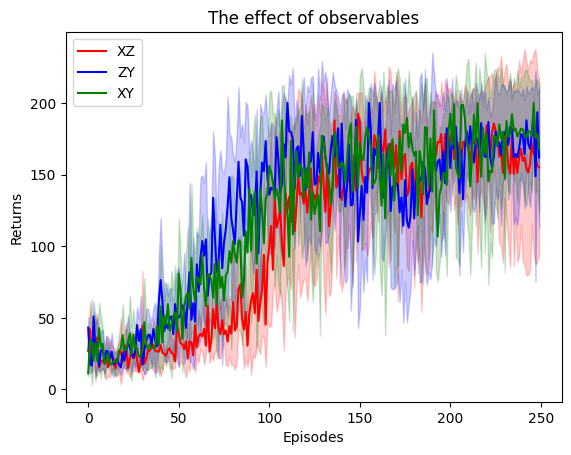

In [15]:
plt.plot(uqc_2qubits_5layers_XZ_return_mean, color = "red", label="XZ")
plt.plot(uqc_2qubits_5layers_ZY_return_mean, color = "blue", label="ZY")
plt.plot(uqc_2qubits_5layers_XY_return_mean, color = "green", label="XY")
plt.fill_between(np.arange(len(uqc_2qubits_5layers_XZ_return_mean)), uqc_2qubits_5layers_XZ_return_mean - uqc_2qubits_5layers_XZ_return_std, uqc_2qubits_5layers_XZ_return_mean + uqc_2qubits_5layers_XZ_return_std, alpha=0.2, color="red")
plt.fill_between(np.arange(len(uqc_2qubits_5layers_ZY_return_mean)), uqc_2qubits_5layers_ZY_return_mean - uqc_2qubits_5layers_ZY_return_std, uqc_2qubits_5layers_ZY_return_mean + uqc_2qubits_5layers_ZY_return_std, alpha=0.2, color="blue")
plt.fill_between(np.arange(len(uqc_2qubits_5layers_XY_return_mean)), uqc_2qubits_5layers_XY_return_mean - uqc_2qubits_5layers_XY_return_std, uqc_2qubits_5layers_XY_return_mean + uqc_2qubits_5layers_XY_return_std, alpha=0.2, color="green")
plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Returns")
plt.title("The effect of observables")
plt.show()

Once again, the three perform very simmilarly. There doesnt seem to be any significant difference between them, except for the fact that the model with XZ seems to learn a little bit slower in the beginning.

### 1.2.2) Relative Parameter Change

In [16]:
uqc_2qubits_5layers_XZ_parameters_relative_change = uqc_2qubits_5layers_XZ.get_parameters_relative_change()
uqc_2qubits_5layers_ZY_parameters_relative_change = uqc_2qubits_5layers_ZY.get_parameters_relative_change()
uqc_2qubits_5layers_XY_parameters_relative_change = uqc_2qubits_5layers_XY.get_parameters_relative_change()

def filter_lists(lists):
    min_length = 10000  # Find the length of the smallest list
    
    filtered_lists = []
    for lst in lists:
        filtered_lst = lst[:min_length]  # Take only the first min_length elements
        filtered_lists.append(filtered_lst)  # Add the filtered list to the result
    
    return filtered_lists

uqc_2qubits_5layers_XZ_parameters_relative_change_filtered = filter_lists(uqc_2qubits_5layers_XZ_parameters_relative_change)
uqc_2qubits_5layers_ZY_parameters_relative_change_filtered = filter_lists(uqc_2qubits_5layers_ZY_parameters_relative_change)
uqc_2qubits_5layers_XY_parameters_relative_change_filtered = filter_lists(uqc_2qubits_5layers_XY_parameters_relative_change)

uqc_2qubits_5layers_XZ_parameters_relative_change_mean = np.mean(uqc_2qubits_5layers_XZ_parameters_relative_change_filtered, axis=0)
uqc_2qubits_5layers_ZY_parameters_relative_change_mean = np.mean(uqc_2qubits_5layers_ZY_parameters_relative_change_filtered, axis=0)
uqc_2qubits_5layers_XY_parameters_relative_change_mean = np.mean(uqc_2qubits_5layers_XY_parameters_relative_change_filtered, axis=0)

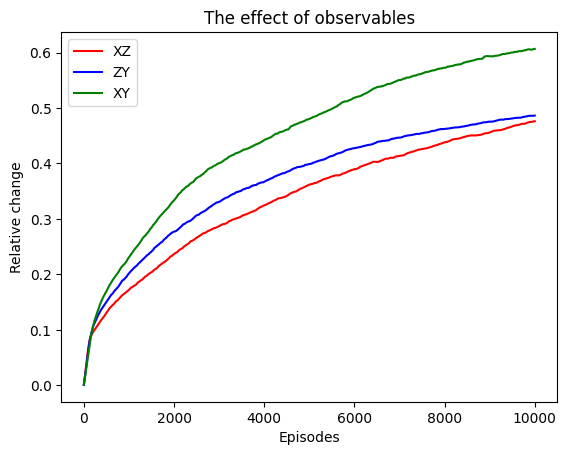

In [17]:
plt.plot(uqc_2qubits_5layers_XZ_parameters_relative_change_mean, color = "red", label="XZ")
plt.plot(uqc_2qubits_5layers_ZY_parameters_relative_change_mean, color = "blue", label="ZY")
plt.plot(uqc_2qubits_5layers_XY_parameters_relative_change_mean, color = "green", label="XY")
plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Relative change")
plt.title("The effect of observables")
plt.show()

Once again, no significant difference.

### 1.2.3) Gradients

In [18]:
uqc_2qubits_5layers_XZ_mean_gradients, uqc_2qubits_5layers_XZ_std_gradients = uqc_2qubits_5layers_XZ.get_gradients_all_params()
uqc_2qubits_5layers_ZY_mean_gradients, uqc_2qubits_5layers_ZY_std_gradients = uqc_2qubits_5layers_ZY.get_gradients_all_params()
uqc_2qubits_5layers_XY_mean_gradients, uqc_2qubits_5layers_XY_std_gradients = uqc_2qubits_5layers_XY.get_gradients_all_params()

uqc_2qubits_5layers_XZ_mean_gradients_smoothed = pd.Series(uqc_2qubits_5layers_XZ_mean_gradients).rolling(250).mean()
uqc_2qubits_5layers_ZY_mean_gradients_smoothed = pd.Series(uqc_2qubits_5layers_ZY_mean_gradients).rolling(250).mean()
uqc_2qubits_5layers_XY_mean_gradients_smoothed = pd.Series(uqc_2qubits_5layers_XY_mean_gradients).rolling(250).mean()

uqc_2qubits_5layers_XZ_std_gradients_smoothed = pd.Series(uqc_2qubits_5layers_XZ_std_gradients).rolling(250).mean()
uqc_2qubits_5layers_ZY_std_gradients_smoothed = pd.Series(uqc_2qubits_5layers_ZY_std_gradients).rolling(250).mean()
uqc_2qubits_5layers_XY_std_gradients_smoothed = pd.Series(uqc_2qubits_5layers_XY_std_gradients).rolling(250).mean()

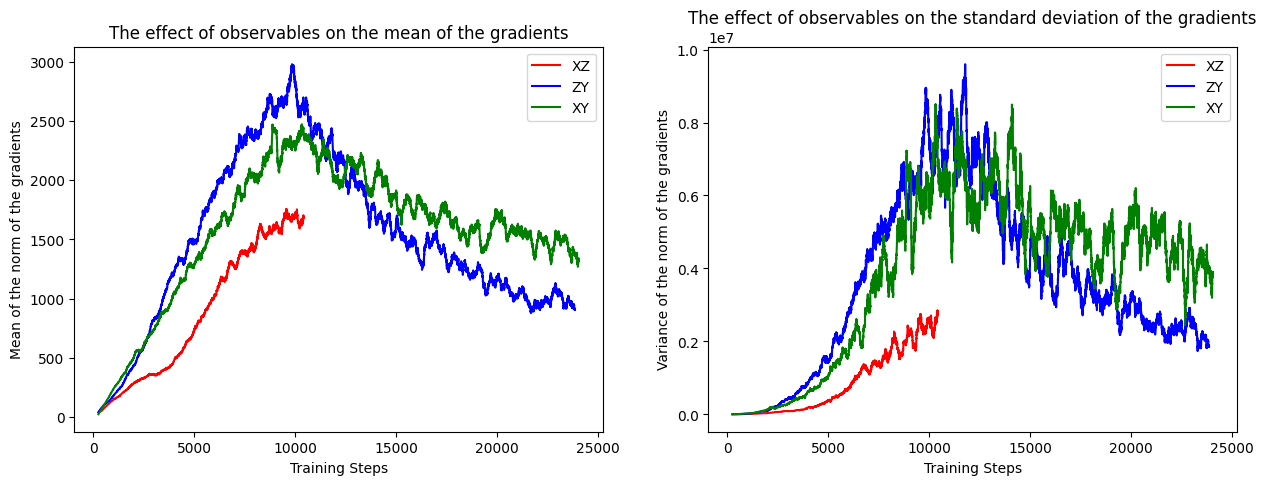

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(uqc_2qubits_5layers_XZ_mean_gradients_smoothed, color = "red", label="XZ")
axs[0].plot(uqc_2qubits_5layers_ZY_mean_gradients_smoothed, color = "blue", label="ZY")
axs[0].plot(uqc_2qubits_5layers_XY_mean_gradients_smoothed, color = "green", label="XY")
axs[0].legend()
axs[0].set_xlabel("Training Steps")
axs[0].set_ylabel("Mean of the norm of the gradients")
axs[0].set_title("The effect of observables on the mean of the gradients")

axs[1].plot(uqc_2qubits_5layers_XZ_std_gradients_smoothed, color = "red", label="XZ")
axs[1].plot(uqc_2qubits_5layers_ZY_std_gradients_smoothed, color = "blue", label="ZY")
axs[1].plot(uqc_2qubits_5layers_XY_std_gradients_smoothed, color = "green", label="XY")
axs[1].legend()
axs[1].set_xlabel("Training Steps")
axs[1].set_ylabel("Variance of the norm of the gradients")
axs[1].set_title("The effect of observables on the standard deviation of the gradients")

plt.show()


The XZ model had at least one agent learn very quickly, but once again it doesnt seem to be a significant difference.

### 1.2.4) Conclusion

The doesnt seem to exist any significant difference between the three non-commuting observables.

Now let's compare the commuting and non-commuting observables.

## 1.3) Non commuting full observables

We measured X and Y for example, but what if we measure XX and YY? Does that make any difference? Now we have three more choices:

- $XXYY$
- $XXZZ$
- $ZZYY$

In [20]:
uqc_2qubits_5layers_XXZZ_path = "../../results/observables_uqc/uqc_2qubits_5layers_XXZZ"
uqc_2qubits_5layers_ZZYY_path = "../../results/observables_uqc/uqc_2qubits_5layers_ZZYY"
uqc_2qubits_5layers_XXYY_path = "../../results/observables_uqc/uqc_2qubits_5layers_XXYY"

uqc_2qubits_5layers_XXZZ = Analysis(uqc_2qubits_5layers_XXZZ_path)
uqc_2qubits_5layers_ZZYY = Analysis(uqc_2qubits_5layers_ZZYY_path)
uqc_2qubits_5layers_XXYY = Analysis(uqc_2qubits_5layers_XXYY_path)

### 1.3.1) Performance

In [21]:
uqc_2qubits_5layers_XXZZ_return = uqc_2qubits_5layers_XXZZ.get_rewards()
uqc_2qubits_5layers_ZZYY_return = uqc_2qubits_5layers_ZZYY.get_rewards()
uqc_2qubits_5layers_XXYY_return = uqc_2qubits_5layers_XXYY.get_rewards()

uqc_2qubits_5layers_XXZZ_return_mean = np.mean(uqc_2qubits_5layers_XXZZ_return, axis=0)
uqc_2qubits_5layers_ZZYY_return_mean = np.mean(uqc_2qubits_5layers_ZZYY_return, axis=0)
uqc_2qubits_5layers_XXYY_return_mean = np.mean(uqc_2qubits_5layers_XXYY_return, axis=0)

uqc_2qubits_5layers_XXZZ_return_std = np.std(uqc_2qubits_5layers_XXZZ_return, axis=0)
uqc_2qubits_5layers_ZZYY_return_std = np.std(uqc_2qubits_5layers_ZZYY_return, axis=0)
uqc_2qubits_5layers_XXYY_return_std = np.std(uqc_2qubits_5layers_XXYY_return, axis=0)

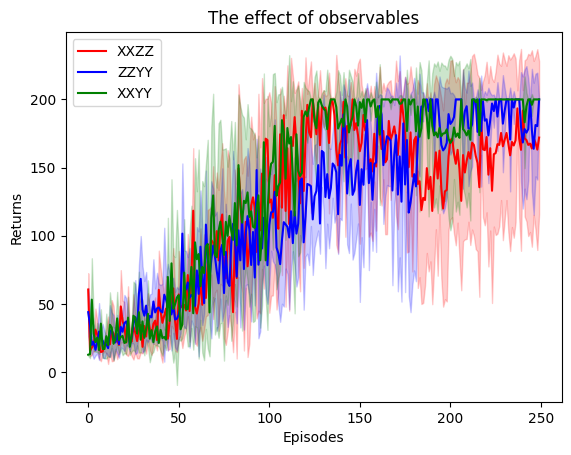

In [22]:
plt.plot(uqc_2qubits_5layers_XXZZ_return_mean, color = "red", label="XXZZ")
plt.plot(uqc_2qubits_5layers_ZZYY_return_mean, color = "blue", label="ZZYY")
plt.plot(uqc_2qubits_5layers_XXYY_return_mean, color = "green", label="XXYY")
plt.fill_between(np.arange(len(uqc_2qubits_5layers_XXZZ_return_mean)), uqc_2qubits_5layers_XXZZ_return_mean - uqc_2qubits_5layers_XXZZ_return_std, uqc_2qubits_5layers_XXZZ_return_mean + uqc_2qubits_5layers_XXZZ_return_std, alpha=0.2, color="red")
plt.fill_between(np.arange(len(uqc_2qubits_5layers_ZZYY_return_mean)), uqc_2qubits_5layers_ZZYY_return_mean - uqc_2qubits_5layers_ZZYY_return_std, uqc_2qubits_5layers_ZZYY_return_mean + uqc_2qubits_5layers_ZZYY_return_std, alpha=0.2, color="blue")
plt.fill_between(np.arange(len(uqc_2qubits_5layers_XXYY_return_mean)), uqc_2qubits_5layers_XXYY_return_mean - uqc_2qubits_5layers_XXYY_return_std, uqc_2qubits_5layers_XXYY_return_mean + uqc_2qubits_5layers_XXYY_return_std, alpha=0.2, color="green")
plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Returns")
plt.title("The effect of observables")
plt.show()

Here it is interesting to note that the XXZZ performed clearly worse than the other two, although this could be possibly explained by a statistical fluctuation. The other two performed very similarly.

### 1.3.2) Relative Parameter Change

In [23]:
uqc_2qubits_5layers_XXZZ_parameters_relative_change = uqc_2qubits_5layers_XXZZ.get_parameters_relative_change()
uqc_2qubits_5layers_ZZYY_parameters_relative_change = uqc_2qubits_5layers_ZZYY.get_parameters_relative_change()
uqc_2qubits_5layers_XXYY_parameters_relative_change = uqc_2qubits_5layers_XXYY.get_parameters_relative_change()

def filter_lists(lists):
    min_length = 10000  # Find the length of the smallest list
    
    filtered_lists = []
    for lst in lists:
        filtered_lst = lst[:min_length]  # Take only the first min_length elements
        filtered_lists.append(filtered_lst)  # Add the filtered list to the result
    
    return filtered_lists

uqc_2qubits_5layers_XXZZ_parameters_relative_change_filtered = filter_lists(uqc_2qubits_5layers_XXZZ_parameters_relative_change)
uqc_2qubits_5layers_ZZYY_parameters_relative_change_filtered = filter_lists(uqc_2qubits_5layers_ZZYY_parameters_relative_change)
uqc_2qubits_5layers_XXYY_parameters_relative_change_filtered = filter_lists(uqc_2qubits_5layers_XXYY_parameters_relative_change)

uqc_2qubits_5layers_XXZZ_parameters_relative_change_mean = np.mean(uqc_2qubits_5layers_XXZZ_parameters_relative_change_filtered, axis=0)
uqc_2qubits_5layers_ZZYY_parameters_relative_change_mean = np.mean(uqc_2qubits_5layers_ZZYY_parameters_relative_change_filtered, axis=0)
uqc_2qubits_5layers_XXYY_parameters_relative_change_mean = np.mean(uqc_2qubits_5layers_XXYY_parameters_relative_change_filtered, axis=0)

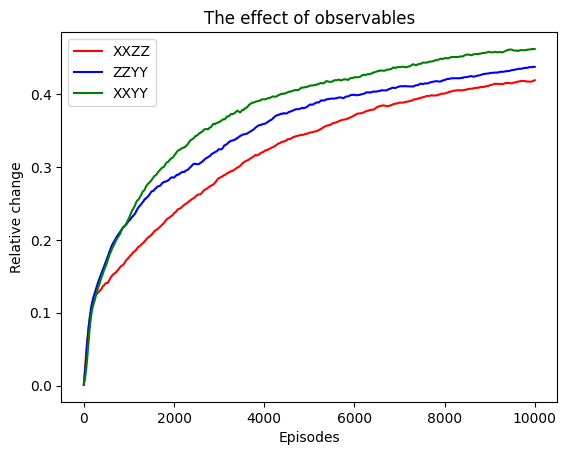

In [24]:
plt.plot(uqc_2qubits_5layers_XXZZ_parameters_relative_change_mean, color = "red", label="XXZZ")
plt.plot(uqc_2qubits_5layers_ZZYY_parameters_relative_change_mean, color = "blue", label="ZZYY")
plt.plot(uqc_2qubits_5layers_XXYY_parameters_relative_change_mean, color = "green", label="XXYY")
plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Relative change")
plt.title("The effect of observables")
plt.show()

Once again, the three are very similar.

### 1.3.3) Gradients

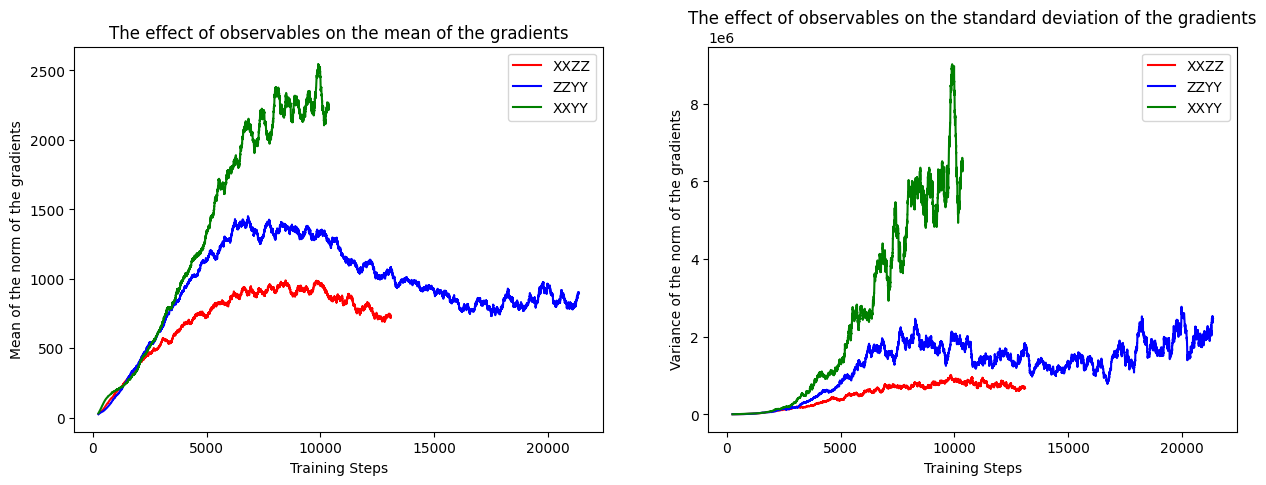

In [25]:
uqc_2qubits_5layers_XXZZ_mean_gradients, uqc_2qubits_5layers_XXZZ_std_gradients = uqc_2qubits_5layers_XXZZ.get_gradients_all_params()
uqc_2qubits_5layers_ZZYY_mean_gradients, uqc_2qubits_5layers_ZZYY_std_gradients = uqc_2qubits_5layers_ZZYY.get_gradients_all_params()
uqc_2qubits_5layers_XXYY_mean_gradients, uqc_2qubits_5layers_XXYY_std_gradients = uqc_2qubits_5layers_XXYY.get_gradients_all_params()

uqc_2qubits_5layers_XXZZ_mean_gradients_smoothed = pd.Series(uqc_2qubits_5layers_XXZZ_mean_gradients).rolling(250).mean()
uqc_2qubits_5layers_ZZYY_mean_gradients_smoothed = pd.Series(uqc_2qubits_5layers_ZZYY_mean_gradients).rolling(250).mean()
uqc_2qubits_5layers_XXYY_mean_gradients_smoothed = pd.Series(uqc_2qubits_5layers_XXYY_mean_gradients).rolling(250).mean()

uqc_2qubits_5layers_XXZZ_std_gradients_smoothed = pd.Series(uqc_2qubits_5layers_XXZZ_std_gradients).rolling(250).mean()
uqc_2qubits_5layers_ZZYY_std_gradients_smoothed = pd.Series(uqc_2qubits_5layers_ZZYY_std_gradients).rolling(250).mean()
uqc_2qubits_5layers_XXYY_std_gradients_smoothed = pd.Series(uqc_2qubits_5layers_XXYY_std_gradients).rolling(250).mean()

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(uqc_2qubits_5layers_XXZZ_mean_gradients_smoothed, color = "red", label="XXZZ")
axs[0].plot(uqc_2qubits_5layers_ZZYY_mean_gradients_smoothed, color = "blue", label="ZZYY")
axs[0].plot(uqc_2qubits_5layers_XXYY_mean_gradients_smoothed, color = "green", label="XXYY")
axs[0].legend()
axs[0].set_xlabel("Training Steps")
axs[0].set_ylabel("Mean of the norm of the gradients")
axs[0].set_title("The effect of observables on the mean of the gradients")

axs[1].plot(uqc_2qubits_5layers_XXZZ_std_gradients_smoothed, color = "red", label="XXZZ")
axs[1].plot(uqc_2qubits_5layers_ZZYY_std_gradients_smoothed, color = "blue", label="ZZYY")
axs[1].plot(uqc_2qubits_5layers_XXYY_std_gradients_smoothed, color = "green", label="XXYY")
axs[1].legend()
axs[1].set_xlabel("Training Steps")
axs[1].set_ylabel("Variance of the norm of the gradients")
axs[1].set_title("The effect of observables on the standard deviation of the gradients")

plt.show()


Here there is a noticeable difference, as the XXYY has by far the biggest gradients and it also seems to be the one with the best performance. But still the difference here is very significant, which is really interesting.

### 1.3.4) Conclusion

Here it seems like there are some clear differences between different combinations of observables.

## 1.4) Commuting vs Non-Commuting Partial vs Non-Commuting Full

### 1.4.1) Performance

In [ ]:
fig, axs = plt.subplots(3,3, figsize=(15, 15), tight_layout=True)

axs[0,0].plot(uqc_2qubits_5layers_XXZZ_mean_gradients_smoothed, color = "red", label="XXZZ")